# Ao3 Tags on "Fix-it Fics" as an Indicator of Satisfying Endings #

Are there common themes among fix it fics that show what audiences crave that shows lack? What do people want from television show endings that show runners are not providing? To answer this, I will scrape data from Archive of Our Own (Ao3) to compare tags used on “fix it” fanfictions, or fanfictions that aim to give the show a “better” ending, across the shows Voltron, Supernatural, and Star Wars: The Sequel Trilogy. The answer to this question could be used to suggest what themes audiences are wanting to see in media in general and could be used as a recommendation to media writers on how to create “satisfying” endings. 

##### *** DISCLAIMER *** #####
There are spoilers for each show I will talk about (Voltron, Supernatural, and the Star Wars Sequel Trilogy). All of these shows were completed within recent years. If you are planning to watch these and do not want spoilers, I would not recommend viewing the conclusion section of this report. 

Also, all of these shows, as stated, are finished. I will be giving my recommendations as if the shows have not aired, but the plot is written so the writers could make changes, even though this is impossible as of today. My overall recommendations and findings, however, could be used to enhance future show writing.


## Data Collection ##

To do this, I will use the following packages.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

I request data from Ao3 using the requests library. I did some work on Ao3's actual page as it would be easier than generate the url, which I was unsure how to do. There is not a lot of documentation on how Ao3 works, as seen by the lack of API, so all urls will be generated on the actual Ao3 site and then pasted over.



### Playing with the Data ###

I wanted to see how to scrape Ao3, so I used Voltron as a test. I obtained the website url to scrape from by doing a manual search on Ao3's website. Ao3 lists 20 fanfics per page, so this will have 20 fanfics worth of tags. Tags are not limited, so the amount of tags is entirely dependent on how many the author decided to list when publishing the fic. I also decided to exclude any explicit labeled fanfictions for the sake of this being a school project and having to present this data. This works out for the overall mission as well, as all of the fandoms I chose are aired on TV and follow FCC guidelines on how graphic their content can be for TV-14/PG-13.

In [2]:
page = requests.request("GET", 'https://archiveofourown.org/tags/Voltron:%20Legendary%20Defender/works?commit=Sort+and+Filter&exclude_work_search%5Brating_ids%5D%5B%5D=13&page=1&utf8=%E2%9C%93&work_search%5Bcomplete%5D=&work_search%5Bcrossover%5D=&work_search%5Bdate_from%5D=&work_search%5Bdate_to%5D=&work_search%5Bexcluded_tag_names%5D=&work_search%5Blanguage_id%5D=&work_search%5Bother_tag_names%5D=Fix-It&work_search%5Bquery%5D=&work_search%5Bsort_column%5D=revised_at&work_search%5Bwords_from%5D=&work_search%5Bwords_to%5D=')

In [3]:
page

<Response [200]>

In [4]:
soup = bs(page.text, "html.parser")

I looked through the soup in order to find what html tags contained the "tag" items that I will need for my analysis. In this case, it is in linked items (<a/href>) with the class "tag".

In [5]:
tags = soup.find_all('a', class_='tag')

With this, I can clean up the list so it just contains what is inside the tags.

In [6]:
tagList = [x.text for x in soup.find_all('a', class_='tag')]

And with that, I have a list of tags for the first 20 fix-it fanfics from Voltron in Ao3. 


### Function Creation ###
Now that I have learned how to scrape the tags from Ao3, I will create a function that can take the fandom name, a data frame, and how many pages to iterate through as parameters and spit out a data frame of tags for that fandom. The function can be used as long as you use the exact phrase used for the fandom as Ao3 does. If it is your first time using the function, use an empty data frame. In order to keep appending onto that data frame, feed that same data frame into the function when using a different fandom title. The function will create a dataframe with two columns: one with the tags and the other with the name of the fandom that tag came from.

The first part of the function is where the showName is changed so the spaces are replaced with "%20", as that is how the url reads spaces. The function updates the showName and then iterates through each page requested, scraping tags from each page. It then goes back through to add the final column of the "Fandom" it came from.

In [7]:
def getTags(showName, df, getPages):
    pageNum = 1
    x = 0
    showNameParse = showName.split()
    showNameAddSpace = ""
    for word in showNameParse:
        showNameAddSpace = showNameAddSpace + showNameParse[x] + "%20"
        x += 1
    #print(showNameAddSpace)
    temp_df = pd.DataFrame()
    while pageNum < getPages:
        page = requests.request("GET", "https://archiveofourown.org/tags/" + showNameAddSpace + "/works?commit=Sort+and+Filter&exclude_work_search%5Brating_ids%5D%5B%5D=13&page=" + str(pageNum) + "&utf8=%E2%9C%93&work_search%5Bcomplete%5D=&work_search%5Bcrossover%5D=&work_search%5Bdate_from%5D=&work_search%5Bdate_to%5D=&work_search%5Bexcluded_tag_names%5D=&work_search%5Blanguage_id%5D=&work_search%5Bother_tag_names%5D=Fix-It&work_search%5Bquery%5D=&work_search%5Bsort_column%5D=revised_at&work_search%5Bwords_from%5D=&work_search%5Bwords_to%5D=")
        soup = bs(page.text, "html.parser")
        tagList = [x.text for x in soup.find_all('a', class_='tag')]
        temp_df = temp_df.append(tagList, ignore_index=True)
        pageNum += 1
        for x in temp_df:
            temp_df["Fandom"] = showName
    df = df.append(temp_df, ignore_index=True)
    return df

### Voltron ###

I chose Voltron for this project due to its notoriety of having a disliked ending by the fans. I will use my function to obtain the tags from the first 10 pages. Originally, I ran the report with 5 pages, which was a number chosen arbitrarily. However, I found that the number of tags pulled from 5 pages was insufficient to find meaningful values in the tag frequency. This will gather tags for the first 200 fanfictions. 

![](C:/Users/frenc/EMATfall21folder/TeamVoltron)

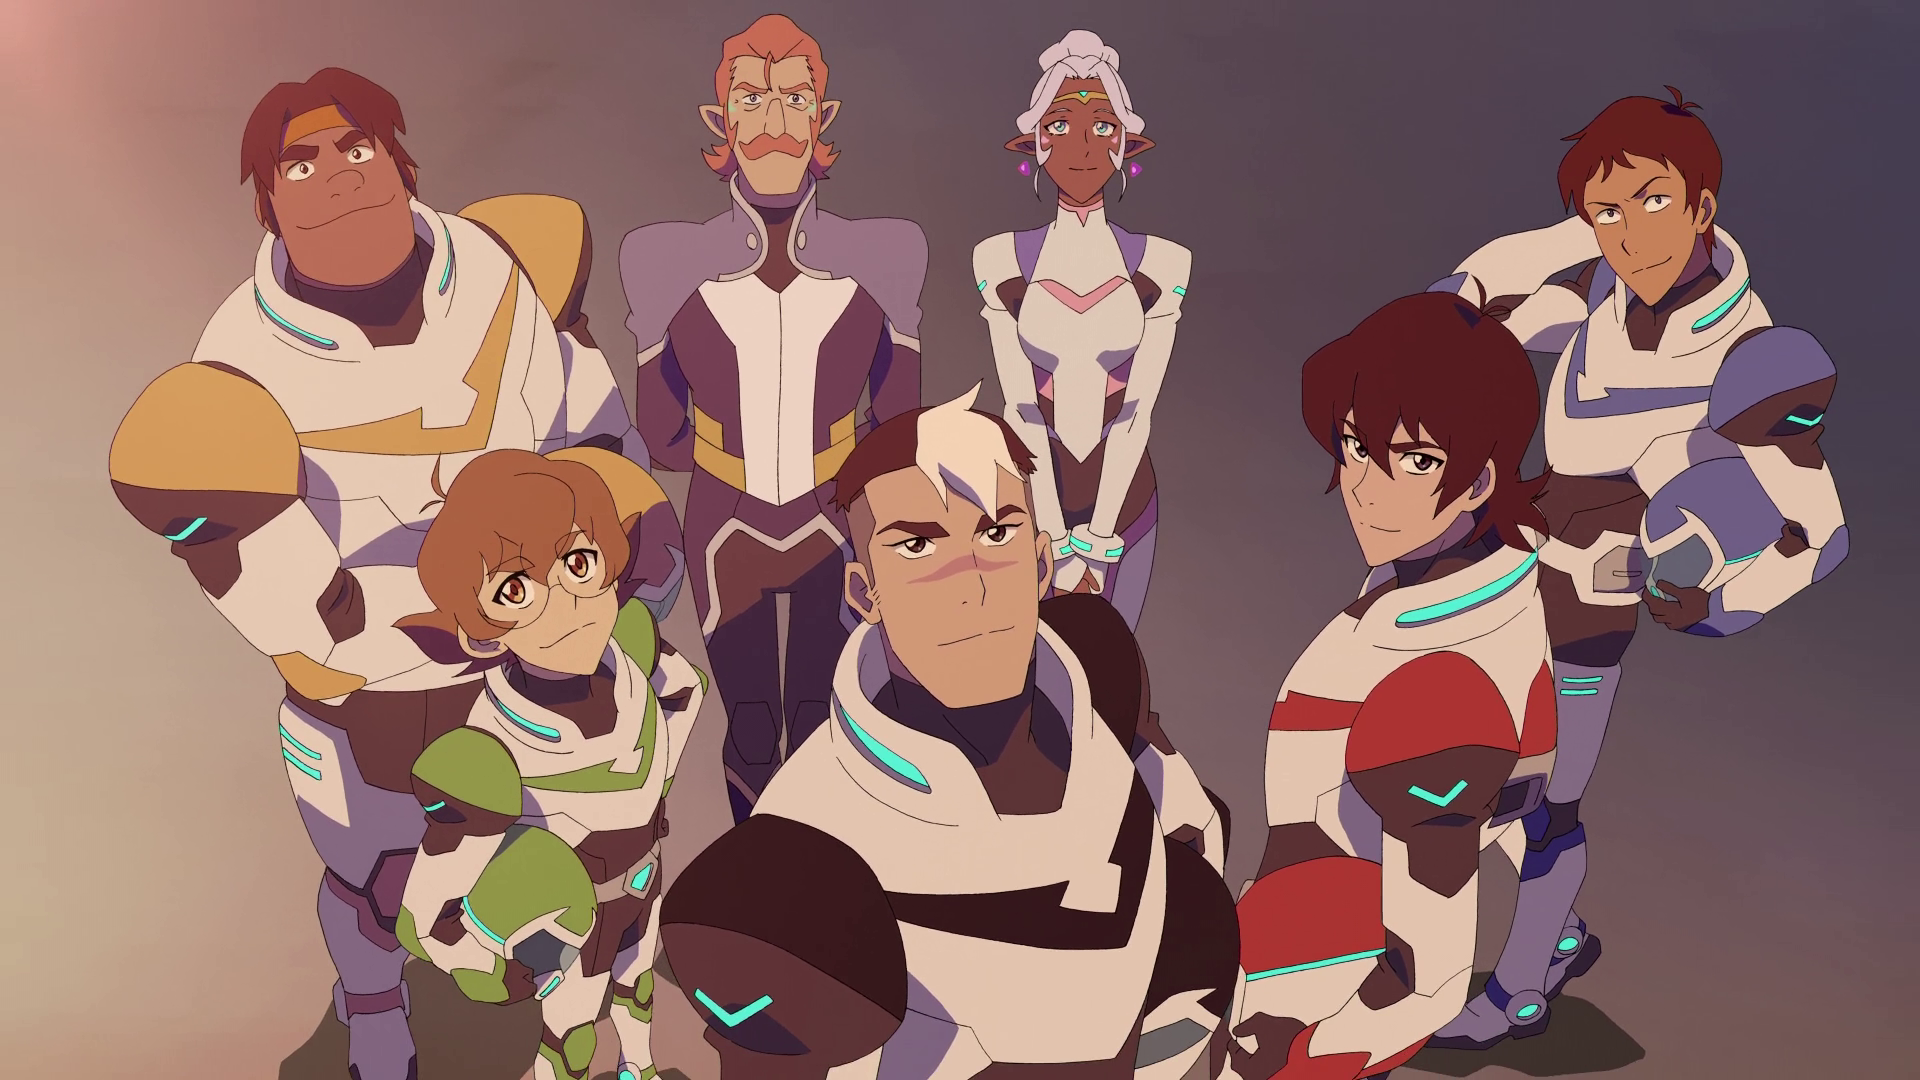

Voltron (2016) *Members of Voltron pose for promotional photo* [Digital Art]. Fandom. https://vld.fandom.com/wiki/Team_Voltron

In [8]:
tag_df = pd.DataFrame()
final_tagList = getTags("Voltron: Legendary Defender", tag_df, 10)

### Supernatural ###

Now that I have 100 fanfics worth of tags for Voltron, I will repeat this process for the tv show Supernatural, chosen for its popularity as the subject of fanfiction (over 240,000 fics!) and for its bad ending. 

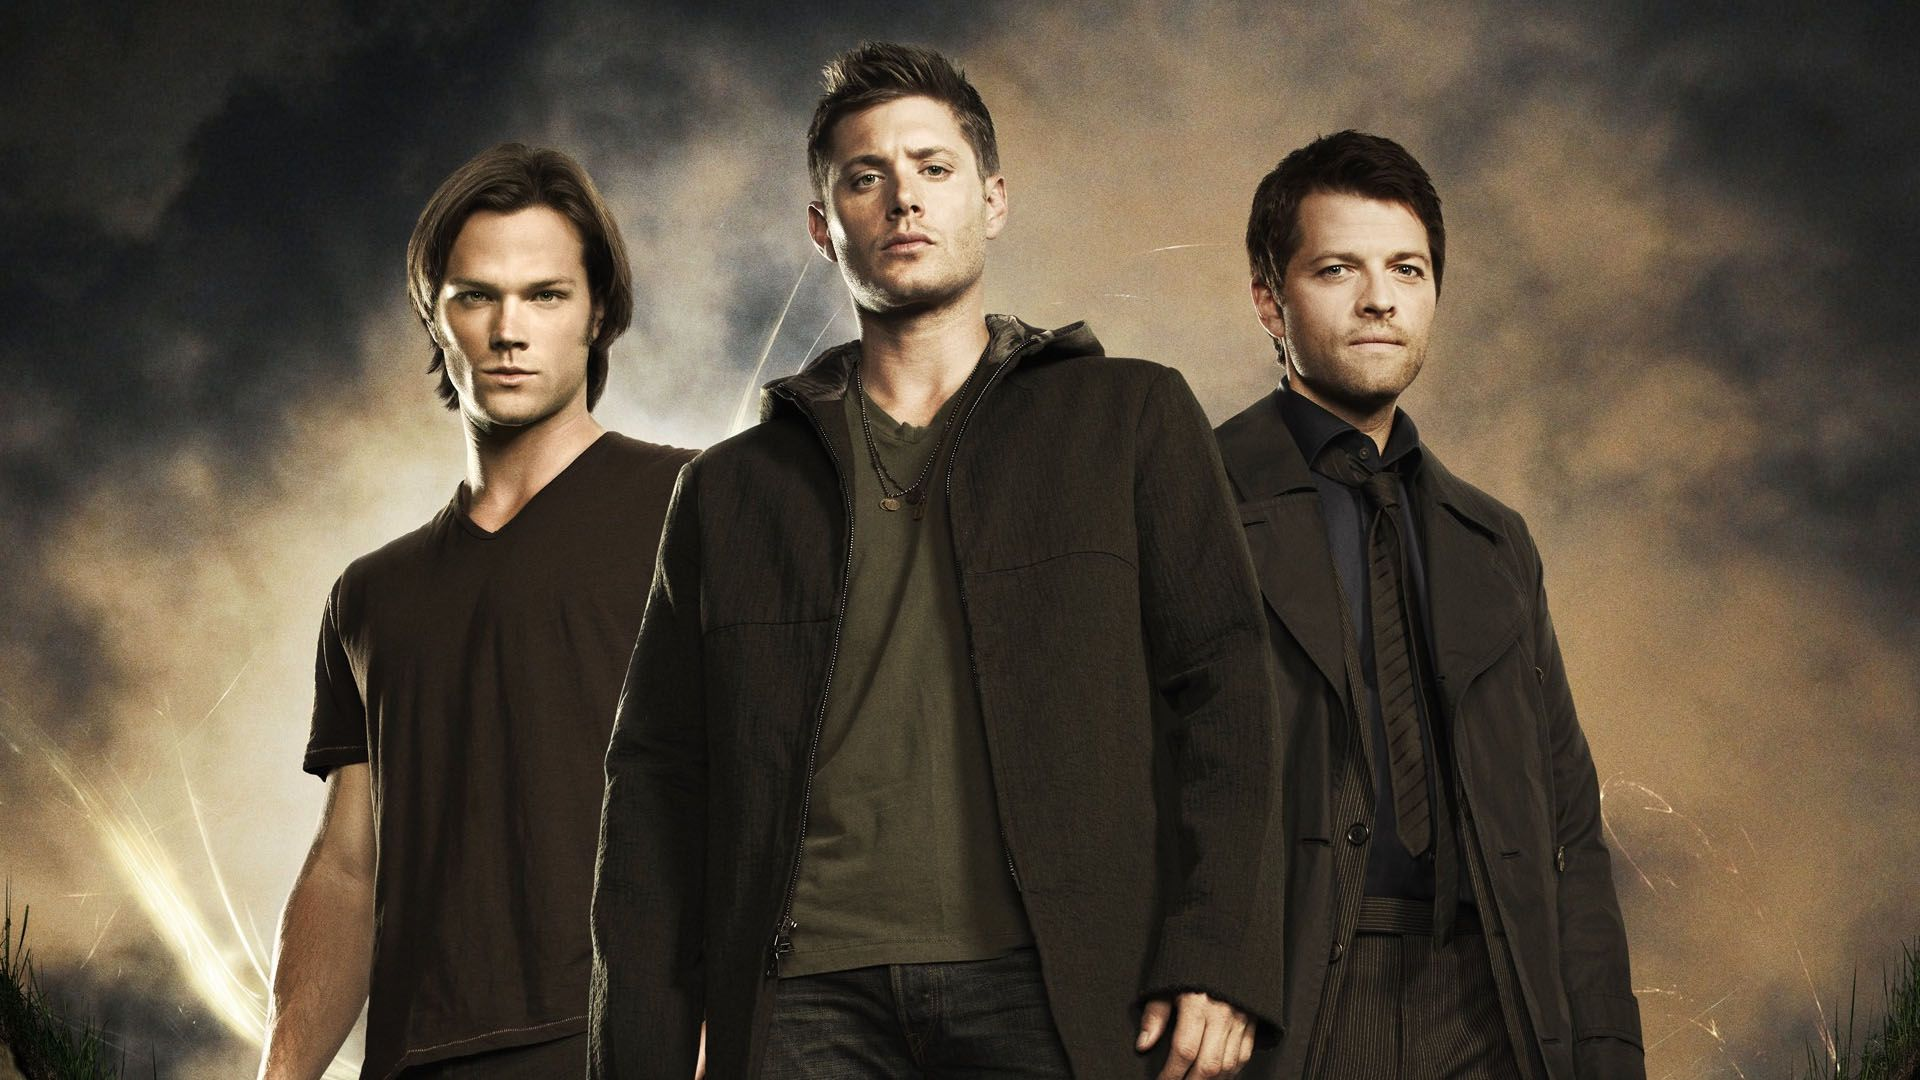

Supernatural (2007) *Characters of Supernatural pose for promotional photo* [Digital Art]. The Nerd. https://thenerddaily.com/reasons-to-watch-supernatural/

In [9]:
final_tagList = getTags("Supernatural", final_tagList, 10)

### Star Wars: The Sequel Trilogy ###

This fandom is different than the previous two chosen as it is much bigger than Voltron or even Supernatural since it encompasses many different movies and tv shows. When I chose Star Wars, I did so because I personally did not like the ending to Star Wars Episode IX: Rise of Skywalker. I did a preliminary check and found fix-it fanfics for that movie. However, when choosing which fandom website to sort and scrape, I found that there were 11 categories for the Star Wars media franchise. Rather than look through all of the media, which was a category, I chose to stay true to what made me pick Star Wars in general and chose the "Star Wars: The Sequel Trilogy" fandom since it includes Rise of Skywalker.

Despite this being a movie trilogy rather than a tv show, I do not expect this media difference to affect tag usage and preferences among fix-it fanfics. 

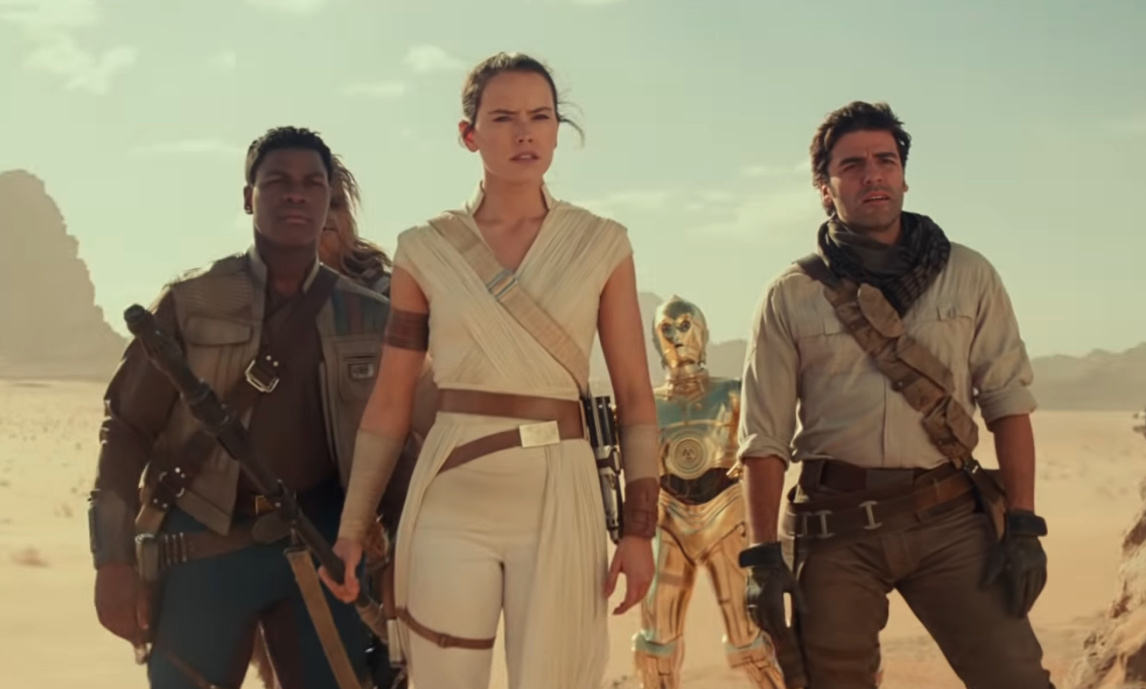

Star Wars: Rise of Skywalker (2007) *Finn, Rey, C3P0 and Poe peer out into a desert land* [Movie Scene]. Indie Wire. https://www.indiewire.com/2019/12/star-wars-the-rise-of-skywalker-spoilers-1202197922/

In [10]:
final_tagList = getTags("Star Wars Sequel Trilogy", final_tagList, 10)

In [11]:
final_tagList.head(15)

,0,Fandom
0,Voltron: Legendary Defender,Voltron: Legendary Defender
1,Voltron: Legendary Defender,Voltron: Legendary Defender
2,Creator Chose Not To Use Archive Warnings,Voltron: Legendary Defender
3,Keith/Lance (Voltron),Voltron: Legendary Defender
4,Keith & Lance (Voltron),Voltron: Legendary Defender
5,Adam/Shiro (Voltron),Voltron: Legendary Defender
6,Adam & Shiro (Voltron),Voltron: Legendary Defender
7,Keith (Voltron),Voltron: Legendary Defender
8,Shiro (Voltron),Voltron: Legendary Defender
9,Adam (Voltron),Voltron: Legendary Defender


## Data Visualization ##

The aspect I am interested in this data is how frequently a certain tag appears within the list. Frequency can be measured a few ways within the data. I will create a pivot table to find and organize the duplicates and then use that information to find the modes within the data. 

In [12]:
final_tagList = final_tagList.rename(columns={0: "Tags"})
final_tagList.pivot_table(columns=['Tags'], aggfunc ='size')

Tags
"Ronedore"                                                            1
"You're nothing but not to me" gets translated into layman's terms    1
#DeanStudies                                                          1
#ReleaseTheRianJohnsonCut                                             1
(Don't Worry)                                                         1
                                                                     ..
you're the reader                                                     1
your honor they're so in love                                         1
zethrid                                                               1
Перевод на русский | Translation in Russian                           1
僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia                1
Length: 6027, dtype: int64

In [13]:
final_tag_pivot_both = final_tagList.pivot_table(columns=['Tags', 'Fandom'], aggfunc ='size')
final_tag_pivot_all = final_tagList.pivot_table(columns=['Tags'], aggfunc = 'size')

I created two pivot tables. The first has the columns organized by the tags and the Fandom, so it will count the frequencies of tags for each specific fandom. The pivot_all table ignores fandoms and looks at the frequency of a tag regardless of the fandom it came from.

I attempted to plot this pivot table to get a first look at what the tag frequencies look like. The tables showed that there are some tags that appear much more often than others that I pulled! The goal is to find these tags and see if I can use them to generate an idea about what themes people look for in shows that to be "fixed." However, the table was unreadable due to the sheer amount of values, so I decided not to show it here. I need to filter out all the tags that only have one or two counts in the table.

When I did this, it showed that there were around 800 tags that are used more than once. That is quite a difference from the over 7000 raw tags I pulled and the 3000 tags when duplicates were accounted for. To find the most frequent tags, I will simply increase the number in the comparison until there are 10 or so tags.

In [14]:
final_tag_pivot_all[final_tag_pivot_all > 65]

Tags
Allura (Voltron)                             104
Alternate Universe - Canon Divergence        142
Angst                                         91
Ben Solo | Kylo Ren                          128
Castiel (Supernatural)                       114
Castiel/Dean Winchester                      136
Coran (Voltron)                               71
Creator Chose Not To Use Archive Warnings    154
Dean Winchester                              162
Finn (Star Wars)                              79
Fix-It                                       172
Fix-It of Sorts                               79
Fluff                                         85
Graphic Depictions Of Violence                77
Hunk (Voltron)                               106
Hurt/Comfort                                  77
Jack Kline                                    81
Keith (Voltron)                              154
Keith/Lance (Voltron)                         81
Lance (Voltron)                              134
No Archive Warn

In [15]:
final_tag_pivot_both[final_tag_pivot_both > 55]

Tags                                       Fandom                     
Allura (Voltron)                           Voltron: Legendary Defender    104
Alternate Universe - Canon Divergence      Voltron: Legendary Defender     57
Ben Solo | Kylo Ren                        Star Wars Sequel Trilogy       128
Castiel (Supernatural)                     Supernatural                   114
Castiel/Dean Winchester                    Supernatural                   136
Coran (Voltron)                            Voltron: Legendary Defender     71
Creator Chose Not To Use Archive Warnings  Star Wars Sequel Trilogy        66
                                           Voltron: Legendary Defender     56
Dean Winchester                            Supernatural                   162
Finn (Star Wars)                           Star Wars Sequel Trilogy        79
Fix-It                                     Supernatural                    78
Hunk (Voltron)                             Voltron: Legendary Defender 

These tags are actually not very helpful. Many of the tags are characters from the show, ship names, or just the show itself. I will need to filter these tags out in order to find the most frequent tags that mention specific themes or events happening rather than stating elements already present in the show.

### A Decision ###

I face a dilmena when deciding if I should drop ship names from the tag list. On the one hand, show runners, my intended target audience for my findings, will most likely not take any advice about romantic relationships from a site notorious for throwing together characters seemingly at random sometimes. However, due to the frequency of these tags, it stands to reason that the ships found are legitimate findings that answer my guiding question. It is true to state that creators on Ao3 wanted to see these characters together, and in a few cases, like Voltron, the canon romantic relationships the writers chose to pursue are one of the reasons the fans disliked this ending so much that they felt it needed to be "fixed." However, show writers often have to pander to a diverse audience, making some popular ships on Ao3 an impossibility to pursue as in these examples, these ships are often mlm or wlw. 

However, it can be seen that show runners are influenced by Ao3 creators, as one of the gay ships popularized on Ao3, Destiel, was made canon in the show Supernatural during its final season. This sets a precedent for shipping popularity to affect a show's direction and writing, so I decided I will keep these tags in my analysis. 

### Cleaning ###
In the following code cells, I will filter out tags of characters, content warnings, and the "fix-it" tags from the dataframe and then present the new pivot tables. I will create two tables for all the shows and a table each for the three fandoms represetned.

In [16]:
no_character_df = final_tagList[(final_tagList.Tags != "Dean Winchester") & (final_tagList.Tags != "Keith (Voltron)") & (final_tagList.Tags != "Lance (Voltron)") & (final_tagList.Tags != "Rey (Star Wars)") & (final_tagList.Tags != "Sam Winchester") & (final_tagList.Tags != "Shiro (Voltron)") & (final_tagList.Tags != "Star Wars Sequel Trilogy") & (final_tagList.Tags != "Supernatural") & (final_tagList.Tags != "Voltron: Legendary Defender") & (final_tagList.Tags != "Fix-It") & (final_tagList.Tags != "Alternate Universe - Canon Divergence") & (final_tagList.Tags != "Creator Chose Not To Use Archive Warnings") & (final_tagList.Tags != "No Archive Warnings Apply") & (final_tagList.Tags != "Allura (Voltron)") & (final_tagList.Tags != "Ben Solo | Kylo Ren") & (final_tagList.Tags != "Castiel (Supernatural)") & (final_tagList.Tags != "Hunk (Voltron)") & (final_tagList.Tags != "Pidge | Katie Holt") & (final_tagList.Tags != "Poe Dameron") & (final_tagList.Tags != "Star Wars - All Media Types") & (final_tagList.Tags != "Finn (Star Wars)") & (final_tagList.Tags != "Coran (Voltron)") & (final_tagList.Tags != "Jack Kline") & (final_tagList.Tags != "Leia Organa") & (final_tagList.Tags != "Luke Skywalker") & (final_tagList.Tags != "Rose Tico") & (final_tagList.Tags != "Post-Canon") & (final_tagList.Tags != "Adam (Voltron)") & (final_tagList.Tags != "Post-Canon Fix-It") & (final_tagList.Tags != "Star Wars: The Rise of Skywalker Fix-It") & (final_tagList.Tags != "Eileen Leahy") & (final_tagList.Tags != "Armitage Hux") & (final_tagList.Tags != "Chewbacca (Star Wars)") & (final_tagList.Tags != "Matt Holt") & (final_tagList.Tags != "Fix-It of Sorts") & (final_tagList.Tags != "Romelle (Voltron)") & (final_tagList.Tags != " ") & (final_tagList.Tags != "Ben Solo") & (final_tagList.Tags != "Bobby Singer") & (final_tagList.Tags != "Claire Novak") & (final_tagList.Tags != "Lotor (Voltron)") & (final_tagList.Tags != "Post-Star Wars: The Rise of Skywalker") & (final_tagList.Tags != "Castiel") & (final_tagList.Tags != "Krolia (Voltron)") & (final_tagList.Tags != "Canon Compliant") & (final_tagList.Tags != "Canon-Typical Violence") & (final_tagList.Tags != "Other Additional Tags to Be Added") & (final_tagList.Tags != "Anakin Skywalker") & (final_tagList.Tags != "Graphic Depictions Of Violence") & (final_tagList.Tags != "Han Solo") & (final_tagList.Tags != "Kylo Ren") & (final_tagList.Tags != "Snoke (Star Wars)")]
no_character_df = no_character_df.dropna(axis=0, how="any")

In [17]:
no_character_pivot_byFandom = no_character_df.pivot_table(columns=['Tags', 'Fandom'], aggfunc ='size')
no_character_pivot_all = no_character_df.pivot_table(columns=['Tags'], aggfunc = 'size')

In [18]:
no_character_pivot_byFandom[no_character_pivot_byFandom > 30]

Tags                         Fandom                     
Adam/Shiro (Voltron)         Voltron: Legendary Defender     43
Angst                        Voltron: Legendary Defender     39
Ben Solo Lives               Star Wars Sequel Trilogy        37
Castiel/Dean Winchester      Supernatural                   136
Eileen Leahy/Sam Winchester  Supernatural                    39
Fluff                        Voltron: Legendary Defender     34
Force Bond (Star Wars)       Star Wars Sequel Trilogy        34
Hurt/Comfort                 Voltron: Legendary Defender     40
Keith/Lance (Voltron)        Voltron: Legendary Defender     81
Keith/Shiro (Voltron)        Voltron: Legendary Defender     35
Kylo Ren/Rey                 Star Wars Sequel Trilogy        42
Rey/Ben Solo                 Star Wars Sequel Trilogy        53
Rey/Ben Solo | Kylo Ren      Star Wars Sequel Trilogy        98
dtype: int64

In [19]:
no_character_pivot_all[no_character_pivot_all > 30]

Tags
Adam/Shiro (Voltron)            43
Angst                           91
Angst with a Happy Ending       65
Ben Solo Lives                  37
Castiel/Dean Winchester        136
Eileen Leahy/Sam Winchester     39
Emotional Hurt/Comfort          32
Fluff                           85
Fluff and Angst                 54
Force Bond (Star Wars)          34
Happy Ending                    45
Hurt/Comfort                    77
Keith/Lance (Voltron)           81
Keith/Shiro (Voltron)           35
Kylo Ren/Rey                    42
Major Character Death           54
Mutual Pining                   36
Rey/Ben Solo                    53
Rey/Ben Solo | Kylo Ren         98
Slow Burn                       57
dtype: int64

In [20]:
no_character_Voltron_df = final_tagList[(final_tagList.Tags != "Dean Winchester") & (final_tagList.Tags != "Keith (Voltron)") & (final_tagList.Tags != "Lance (Voltron)") & (final_tagList.Tags != "Rey (Star Wars)") & (final_tagList.Tags != "Sam Winchester") & (final_tagList.Tags != "Shiro (Voltron)") & (final_tagList.Tags != "Star Wars Sequel Trilogy") & (final_tagList.Tags != "Supernatural") & (final_tagList.Tags != "Voltron: Legendary Defender") & (final_tagList.Tags != "Fix-It") & (final_tagList.Tags != "Alternate Universe - Canon Divergence") & (final_tagList.Tags != "Creator Chose Not To Use Archive Warnings") & (final_tagList.Tags != "No Archive Warnings Apply") & (final_tagList.Tags != "Allura (Voltron)") & (final_tagList.Tags != "Ben Solo | Kylo Ren") & (final_tagList.Tags != "Castiel (Supernatural)") & (final_tagList.Tags != "Hunk (Voltron)") & (final_tagList.Tags != "Pidge | Katie Holt") & (final_tagList.Tags != "Poe Dameron") & (final_tagList.Tags != "Star Wars - All Media Types") & (final_tagList.Tags != "Finn (Star Wars)") & (final_tagList.Tags != "Coran (Voltron)") & (final_tagList.Tags != "Jack Kline") & (final_tagList.Tags != "Leia Organa") & (final_tagList.Tags != "Luke Skywalker") & (final_tagList.Tags != "Rose Tico") & (final_tagList.Tags != "Post-Canon") & (final_tagList.Tags != "Adam (Voltron)") & (final_tagList.Tags != "Post-Canon Fix-It") & (final_tagList.Tags != "Star Wars: The Rise of Skywalker Fix-It") & (final_tagList.Tags != "Eileen Leahy") & (final_tagList.Tags != "Armitage Hux") & (final_tagList.Tags != "Chewbacca (Star Wars)") & (final_tagList.Tags != "Matt Holt") & (final_tagList.Tags != "Fix-It of Sorts") & (final_tagList.Tags != "Romelle (Voltron)") & (final_tagList.Tags != " ") & (final_tagList.Tags != "Ben Solo") & (final_tagList.Tags != "Bobby Singer") & (final_tagList.Tags != "Claire Novak") & (final_tagList.Tags != "Lotor (Voltron)") & (final_tagList.Tags != "Post-Star Wars: The Rise of Skywalker") & (final_tagList.Tags != "Castiel") & (final_tagList.Tags != "Krolia (Voltron)") & (final_tagList.Tags != "Canon Compliant") & (final_tagList.Tags != "Canon-Typical Violence") & (final_tagList.Tags != "Other Additional Tags to Be Added") & (final_tagList.Tags != "Anakin Skywalker") & (final_tagList.Tags != "Graphic Depictions Of Violence") & (final_tagList.Tags != "Han Solo") & (final_tagList.Tags != "Kylo Ren") & (final_tagList.Tags != "Snoke (Star Wars)") & (final_tagList.Fandom == "Voltron: Legendary Defender")]
no_character_Supernatural_df = final_tagList[(final_tagList.Tags != "Dean Winchester") & (final_tagList.Tags != "Keith (Voltron)") & (final_tagList.Tags != "Lance (Voltron)") & (final_tagList.Tags != "Rey (Star Wars)") & (final_tagList.Tags != "Sam Winchester") & (final_tagList.Tags != "Shiro (Voltron)") & (final_tagList.Tags != "Star Wars Sequel Trilogy") & (final_tagList.Tags != "Supernatural") & (final_tagList.Tags != "Voltron: Legendary Defender") & (final_tagList.Tags != "Fix-It") & (final_tagList.Tags != "Alternate Universe - Canon Divergence") & (final_tagList.Tags != "Creator Chose Not To Use Archive Warnings") & (final_tagList.Tags != "No Archive Warnings Apply") & (final_tagList.Tags != "Allura (Voltron)") & (final_tagList.Tags != "Ben Solo | Kylo Ren") & (final_tagList.Tags != "Castiel (Supernatural)") & (final_tagList.Tags != "Hunk (Voltron)") & (final_tagList.Tags != "Pidge | Katie Holt") & (final_tagList.Tags != "Poe Dameron") & (final_tagList.Tags != "Star Wars - All Media Types") & (final_tagList.Tags != "Finn (Star Wars)") & (final_tagList.Tags != "Coran (Voltron)") & (final_tagList.Tags != "Jack Kline") & (final_tagList.Tags != "Leia Organa") & (final_tagList.Tags != "Luke Skywalker") & (final_tagList.Tags != "Rose Tico") & (final_tagList.Tags != "Post-Canon") & (final_tagList.Tags != "Adam (Voltron)") & (final_tagList.Tags != "Post-Canon Fix-It") & (final_tagList.Tags != "Star Wars: The Rise of Skywalker Fix-It") & (final_tagList.Tags != "Eileen Leahy") & (final_tagList.Tags != "Armitage Hux") & (final_tagList.Tags != "Chewbacca (Star Wars)") & (final_tagList.Tags != "Matt Holt") & (final_tagList.Tags != "Fix-It of Sorts") & (final_tagList.Tags != "Romelle (Voltron)") & (final_tagList.Tags != " ") & (final_tagList.Tags != "Ben Solo") & (final_tagList.Tags != "Bobby Singer") & (final_tagList.Tags != "Claire Novak") & (final_tagList.Tags != "Lotor (Voltron)") & (final_tagList.Tags != "Post-Star Wars: The Rise of Skywalker") & (final_tagList.Tags != "Castiel") & (final_tagList.Tags != "Krolia (Voltron)") & (final_tagList.Tags != "Canon Compliant") & (final_tagList.Tags != "Canon-Typical Violence") & (final_tagList.Tags != "Other Additional Tags to Be Added") & (final_tagList.Tags != "Anakin Skywalker") & (final_tagList.Tags != "Graphic Depictions Of Violence") & (final_tagList.Tags != "Han Solo") & (final_tagList.Tags != "Kylo Ren") & (final_tagList.Tags != "Snoke (Star Wars)") & (final_tagList.Fandom == "Supernatural")]
no_character_StarWars_df = final_tagList[(final_tagList.Tags != "Dean Winchester") & (final_tagList.Tags != "Keith (Voltron)") & (final_tagList.Tags != "Lance (Voltron)") & (final_tagList.Tags != "Rey (Star Wars)") & (final_tagList.Tags != "Sam Winchester") & (final_tagList.Tags != "Shiro (Voltron)") & (final_tagList.Tags != "Star Wars Sequel Trilogy") & (final_tagList.Tags != "Supernatural") & (final_tagList.Tags != "Voltron: Legendary Defender") & (final_tagList.Tags != "Fix-It") & (final_tagList.Tags != "Alternate Universe - Canon Divergence") & (final_tagList.Tags != "Creator Chose Not To Use Archive Warnings") & (final_tagList.Tags != "No Archive Warnings Apply") & (final_tagList.Tags != "Allura (Voltron)") & (final_tagList.Tags != "Ben Solo | Kylo Ren") & (final_tagList.Tags != "Castiel (Supernatural)") & (final_tagList.Tags != "Hunk (Voltron)") & (final_tagList.Tags != "Pidge | Katie Holt") & (final_tagList.Tags != "Poe Dameron") & (final_tagList.Tags != "Star Wars - All Media Types") & (final_tagList.Tags != "Finn (Star Wars)") & (final_tagList.Tags != "Coran (Voltron)") & (final_tagList.Tags != "Jack Kline") & (final_tagList.Tags != "Leia Organa") & (final_tagList.Tags != "Luke Skywalker") & (final_tagList.Tags != "Rose Tico") & (final_tagList.Tags != "Post-Canon") & (final_tagList.Tags != "Adam (Voltron)") & (final_tagList.Tags != "Post-Canon Fix-It") & (final_tagList.Tags != "Star Wars: The Rise of Skywalker Fix-It") & (final_tagList.Tags != "Eileen Leahy") & (final_tagList.Tags != "Armitage Hux") & (final_tagList.Tags != "Chewbacca (Star Wars)") & (final_tagList.Tags != "Matt Holt") & (final_tagList.Tags != "Fix-It of Sorts") & (final_tagList.Tags != "Romelle (Voltron)") & (final_tagList.Tags != " ") & (final_tagList.Tags != "Ben Solo") & (final_tagList.Tags != "Bobby Singer") & (final_tagList.Tags != "Claire Novak") & (final_tagList.Tags != "Lotor (Voltron)") & (final_tagList.Tags != "Post-Star Wars: The Rise of Skywalker") & (final_tagList.Tags != "Castiel") & (final_tagList.Tags != "Krolia (Voltron)") & (final_tagList.Tags != "Canon Compliant") & (final_tagList.Tags != "Canon-Typical Violence") & (final_tagList.Tags != "Other Additional Tags to Be Added") & (final_tagList.Tags != "Anakin Skywalker") & (final_tagList.Tags != "Graphic Depictions Of Violence") & (final_tagList.Tags != "Han Solo") & (final_tagList.Tags != "Kylo Ren") & (final_tagList.Tags != "Snoke (Star Wars)") & (final_tagList.Fandom == "Star Wars Sequel Trilogy")]


no_character_pivot_Voltron = no_character_Voltron_df.pivot_table(columns=['Tags'], aggfunc = 'size')
no_character_pivot_Supernatural = no_character_Supernatural_df.pivot_table(columns=['Tags'], aggfunc = 'size')
no_character_pivot_StarWars = no_character_StarWars_df.pivot_table(columns=['Tags'], aggfunc = 'size')

In [21]:
no_character_pivot_Voltron[no_character_pivot_Voltron > 20]

Tags
Adam (Voltron) Lives                  28
Adam/Shiro (Voltron)                  43
Angst                                 39
Bisexual Lance (Voltron)              27
Fluff                                 34
Fluff and Angst                       21
Gay Keith (Voltron)                   25
Hurt/Comfort                          40
Keith & Lance (Voltron)               29
Keith & Shiro (Voltron)               28
Keith (Voltron) is Bad at Feelings    24
Keith/Lance (Voltron)                 81
Keith/Shiro (Voltron)                 35
Pining Keith (Voltron)                29
Slow Burn                             27
dtype: int64

In [22]:
no_character_pivot_Supernatural[no_character_pivot_Supernatural > 20]

Tags
Angst                                28
Angst with a Happy Ending            27
Castiel/Dean Winchester             136
Dean Winchester & Sam Winchester     23
Eileen Leahy/Sam Winchester          39
Fluff                                30
Hurt/Comfort                         24
dtype: int64

In [23]:
no_character_pivot_StarWars[no_character_pivot_StarWars > 20]

Tags
Angst                        24
Ben Solo Lives               37
Fluff                        21
Force Bond (Star Wars)       34
Kylo Ren/Rey                 42
Major Character Death        26
Redeemed Ben Solo            30
Rey & Ben Solo | Kylo Ren    25
Rey/Ben Solo                 53
Rey/Ben Solo | Kylo Ren      98
Reylo - Freeform             28
dtype: int64

<AxesSubplot:ylabel='Tags'>

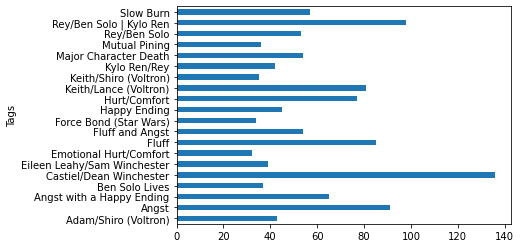

In [24]:
no_character_pivot_all[no_character_pivot_all > 30].plot.barh()

<AxesSubplot:ylabel='Tags,Fandom'>

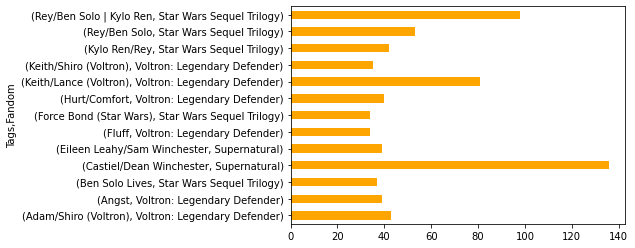

In [25]:
no_character_pivot_byFandom[no_character_pivot_byFandom > 30].plot.barh(color = "orange")

<AxesSubplot:ylabel='Tags'>

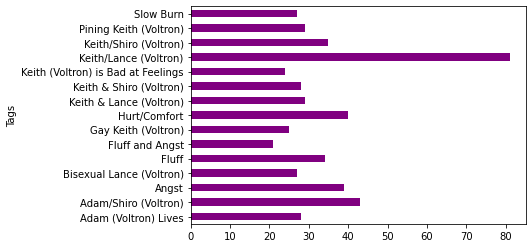

In [26]:
no_character_pivot_Voltron[no_character_pivot_Voltron > 20].plot.barh(color = "purple")

<AxesSubplot:ylabel='Tags'>

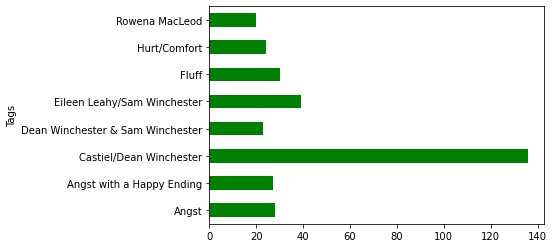

In [27]:
no_character_pivot_Supernatural[no_character_pivot_Supernatural > 18].plot.barh(color = "green")

<AxesSubplot:ylabel='Tags'>

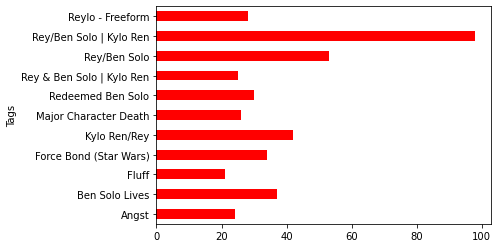

In [28]:
no_character_pivot_StarWars[no_character_pivot_StarWars > 20].plot.barh(color = "red")

## Conclusions ##

The most popular tags overall are Angst, Fluff, Hurt/Comfort, and Slow Burn. Ship name tags are also quite popular, with Destiel, Reylo, and Klance being the ships of choice. When looking at each fandom individually, the tags show that fluff and angst are consistent across the fandoms. Happy endings are a common tag shared between Supernatural and Star Wars Sequel Trilogy, while Volton tags are about building to a romance/ unrequited love. 

Through these charts, we are able to see what the creators on Ao3 felt needed to be fixed across these three shows.

### Voltron ###
The Voltron graphs reveals that most creators on Ao3 wrote about the popular ship Keith/Lance (Klance). This ship was not canon in the show, as Lance canonically is interested in Allura. Keith is in 7 out of 15 tags shown on the graph, indicating that he is a popular character. 

The character Adam is also in the tag list a few times. Adam is a character that was added to the show as a romantic interest for Shiro. This was significant as it was the first homosexual relationship to be canonized in the show. Many fans were disappointed by Adam, though, as he was dead and just added to Shiro's backstory. This explains the inclusion of the "Adam lives" tag.

Tags such as hurt/comfort and fluff/angst show that the creators on Ao3 are looking for social interactions between characters rather than action packed sequences. These tags are added to fanfictions where characters work through miscommunications, struggles, and interact on an emotional level. 

Due to these facts, I would recommend to show runner to include more character connections rather than focusing on action. As a fantasy action show, there still needs to be more human connections showcased throughout with real feeling struggles. Based on the tags listed, viewers do not feel satisfied with the current level of character development. Relationships on the show should demonstrate human struggles as well as triumphs to fulfill the emotional needs of the audience. There should also be more plot lines with Keith, as he is a fan favorite, and to consider if it made sense to include the romance between Keith and Lance, as this is the most popular ship. This leads into the last recommendation, which is to handle mlm and wlw relationships on the show with more care, tact, and emotion. The mlm relationship on the show between Adam and Shiro was not well received, as many fanfictions "fixed" their relationship and brought Adam on as a main character rather than a tragic backstory. 


<AxesSubplot:ylabel='Tags'>

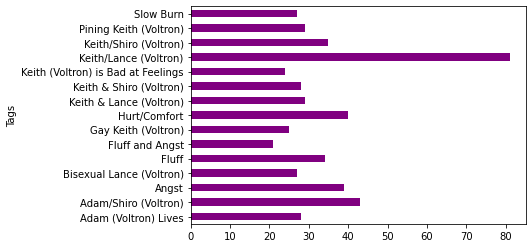

In [29]:
no_character_pivot_Voltron[no_character_pivot_Voltron > 20].plot.barh(color = "purple")

### Supernatural ###
There is a clear win in 'most popular tag.' The ship tag between Castiel and Dean is by far the most popular, with about 100 more uses than the second most common tag. As discussed previously, the this show actually did include a Castiel/Dean (Destiel) moment in the last season of the show. Similar to Voltron, however, fans were not 100% happy with how this scene played out between these characters. Castiel confesses his love to Dean as Castiel is dying, contributing to the "bury your gays" trope, where many show writers will add in a gay relationship and then immediately kill off one or both of the characters. This may have also lead to the prevalence of "happy ending" tags seen.

The "happy ending" tag may also be coupled with the "s15 ep20 fix-it" tag. Season 15 episode 20 is the last episode of the series, and although I did not watch this episode, I do know there is a major character death, so the tag could be used to reverse this decisions. However, there is no "Dean is alive" tag that is popular, so I am not confident that the character death is what is being "fixed" in these fanfictions. 

Besides some other ships in the show, hurt/comfort and fluff/angst make an appearance in the list. As with Voltron, this indicates more emotions and connections between characters.

Based on these tags, my recommendations to the show runners of Supernatural would be to introduce the connection between Castiel and Dean earlier in the show to allow these feelings to be explored between the characters. To be put in the perspective of an audience member who wanted to see Destiel, you spent the whole 15 seasons of the show seeing a potential connection between these characters. It is assumed that the show will never canonize a romantic connection, but then, in the final season, they reveal that there were romantic intentions with one of the characters. But alas, this character is now dead and the audience is left to deal with the emotions of this confession as well as the emotions that come with a character death. This can feel unsatisfying, and having an earlier reveal could have rectified this. 

<AxesSubplot:ylabel='Tags'>

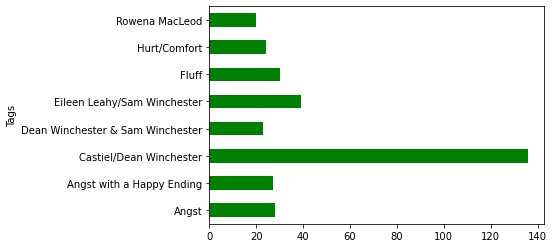

In [30]:
no_character_pivot_Supernatural[no_character_pivot_Supernatural > 18].plot.barh(color = "green")

### Star Wars Sequel Trilogy ###
The two main plot points being "fixed" in this series have to do with Kylo Ren. Based on the tags seen in the chart below, Ao3 creators wanted to see more Kylo Ren and Rey content as well as having Kylo Ren redeemed. This is another series where the show runners listened to fans and added a canon relationship between Kylo and Rey. But, like in the previous show, this relationship was canonized by the confession of love between both characters as they were in mortal danger and one did die. This fact along with the presence of the angst and fluff tags indicate that people wanted to see this potential relationship grow and develop before the final scenes of the movie, allowing for more human moments and conflict/resolutions to happen and strengthen the connection between these two characters. 

Kylo Ren was redeemed, in a way, at the end of the film by helping Rey defeat the bad guy. However, he was killed in the process. Many tags indicate that fans would have like to have seen Kylo have more opportunities to redeem himself and to interact with the other characters after he had been redeemed. 

My recommendations to the Star Wars writers based on the most popular fix it fics tags would be to allow more time to explore the feelings between Kylo and Rey in canon as well as letting the transition of Kylo from bad guy to good guy take up more time as well. 

<AxesSubplot:ylabel='Tags'>

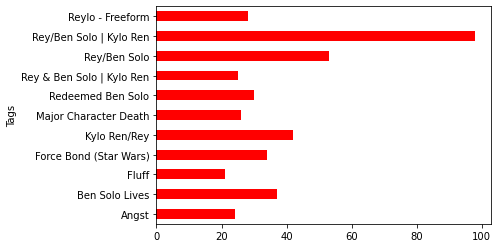

In [31]:
no_character_pivot_StarWars[no_character_pivot_StarWars > 20].plot.barh(color = "red")

### Limitations ###
My findings and recommendations are severely limited. The main way in which I am limited is in the scope. In order to make recommendations to show runner, I want to be able to say "the majority of the audience wants..." In this report, I am assuming that content creators on Ao3 share the opinions as the majority of audience members, which I have no way to verify. It also highlights people who were unhappy with the ending, as I specfically looked at fix-it fics, and did not compare this with fanfictions that were happy with the endings. I did choose the shows based on what I personally had seen in the audience communities and chose series that had "bad" endings, but I did not back up these choices with data that compared fix-it fics to fictions that were written in canon with the endings. 


### Overall Recommendations ###

<AxesSubplot:ylabel='Tags'>

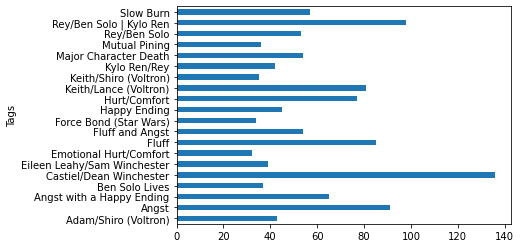

In [32]:
no_character_pivot_all[no_character_pivot_all > 30].plot.barh()

Looking at all of the tags regardless of fandom, I would recommend to show runners to include more character driven content and plot within shows rather than relying on action. With popular tags on fix-it fics being angst, hurt/comfort, and fluff, it is clear that audiences are craving emotional connections between characters and how social consequences can shape relationships. All of these franchises are built on action, but it is clear that action alone will leave audiences wanting and drives people to create their own endings to fill this void.

To prevent your own show from having many fix-it fics written about it, I would recommend balancing action with character driven plot development as well as allowing any potential relationships to have room to grow and develop connections.